# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Reading csv file

In [2]:
df=pd.read_csv('uberhalf.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# Dropping unnecessray columns

In [4]:
df.drop(['Unnamed: 0','key'],axis=1,inplace=True)

In [5]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# Checking Null values

In [6]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

# Checking Duplicates

In [7]:
df.duplicated().sum()

0

# Checking the Shape and information of the DataFrame

In [8]:
df.shape

(49999, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        49999 non-null  float64
 1   pickup_datetime    49999 non-null  object 
 2   pickup_longitude   49999 non-null  float64
 3   pickup_latitude    49999 non-null  float64
 4   dropoff_longitude  49999 non-null  float64
 5   dropoff_latitude   49999 non-null  float64
 6   passenger_count    49999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


# Since ' pickup_datetime' column is in object datatype, we need to convert into datetime format

In [10]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        49999 non-null  float64            
 1   pickup_datetime    49999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   49999 non-null  float64            
 3   pickup_latitude    49999 non-null  float64            
 4   dropoff_longitude  49999 non-null  float64            
 5   dropoff_latitude   49999 non-null  float64            
 6   passenger_count    49999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 2.7 MB


In [13]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,11.420969,-72.549041,39.930828,-72.561809,39.939929,1.679354
std,10.089800,11.211600,6.096038,10.708954,6.067248,1.298328
min,0.000000,-748.016667,-74.015515,-737.916665,-74.008745,0.000000
25%,6.000000,-73.992142,40.734628,-73.991462,40.733620,1.000000
50%,8.500000,-73.981865,40.752451,-73.980102,40.752918,1.000000
75%,12.500000,-73.967149,40.767109,-73.963597,40.768193,2.000000
max,350.000000,40.781825,45.031653,40.828377,45.031598,6.000000


# Handling latitude and longitude columns

In [14]:
df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

In [15]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000
mean,11.420568,-72.522247,39.930780,-72.548444,39.939882,1.679374
std,10.089551,10.382567,6.096218,10.287541,6.067427,1.298359
min,0.000000,-93.824668,-74.015515,-75.458979,-74.008745,0.000000
25%,6.000000,-73.992141,40.734629,-73.991462,40.733621,1.000000
50%,8.500000,-73.981865,40.752451,-73.980097,40.752919,1.000000
75%,12.500000,-73.967147,40.767109,-73.963594,40.768193,2.000000
max,350.000000,40.781825,45.031653,40.828377,45.031598,6.000000


# Slicing the 'pickup_datetime' column into hour,day,month,year,weekday columns

In [16]:
df['day']=df['pickup_datetime'].apply(lambda x:x.day)
df['hour']=df['pickup_datetime'].apply(lambda x:x.hour)
df['month']=df['pickup_datetime'].apply(lambda x:x.month)
df['year']=df['pickup_datetime'].apply(lambda x:x.year)
df['weekday']=df['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

In [17]:
df.weekday = df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [18]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,4
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,5
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,5
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,4


# Removing the 'pickup_datetime' column

In [19]:
df.drop(labels = 'pickup_datetime',axis=1,inplace=True)

In [20]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,4
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,5
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,5
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,4


# Data Visualization

# 1.Countplot of Passenger count

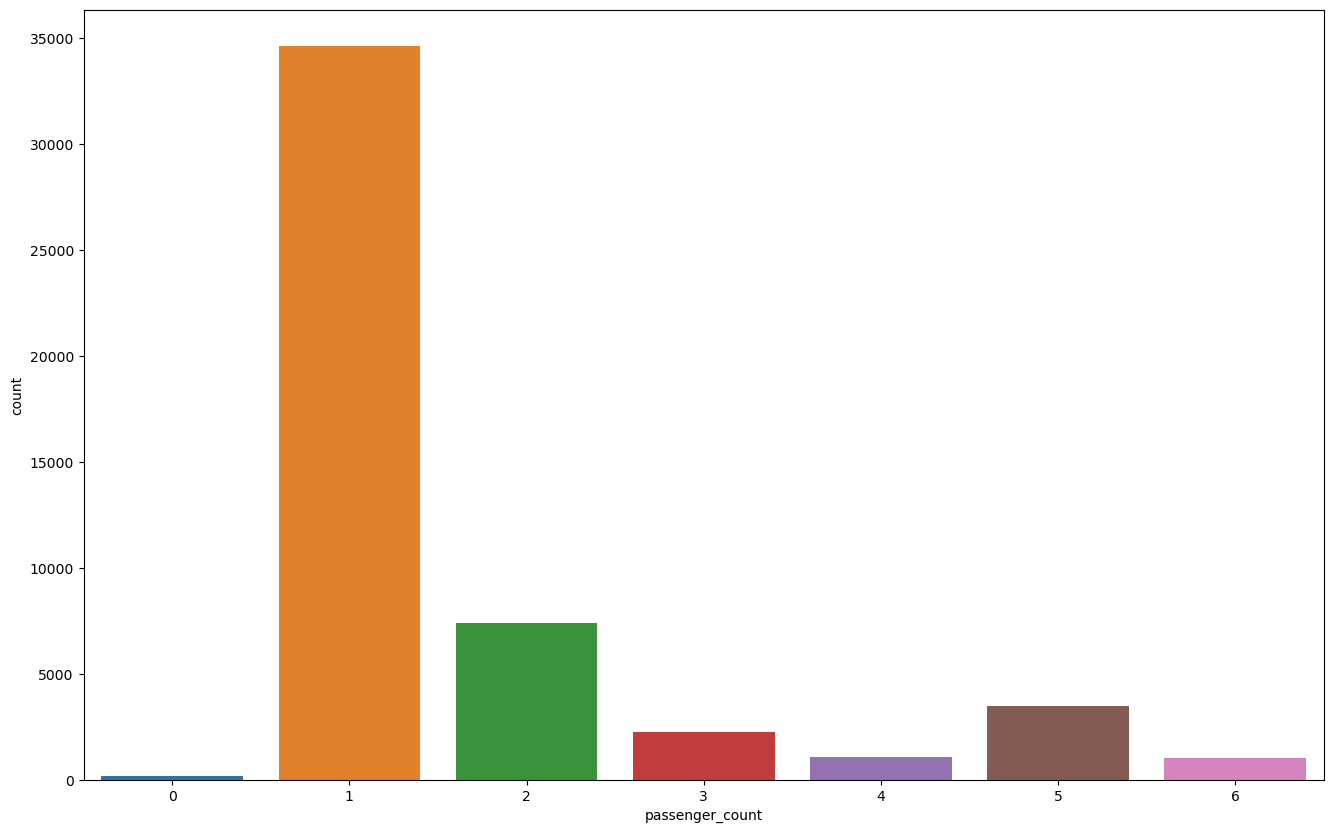

In [21]:
plt.figure(figsize=(16,10))
sns.countplot(df['passenger_count'])
plt.show()

# 2.Visualizing the Distribution of 'fare_amount'

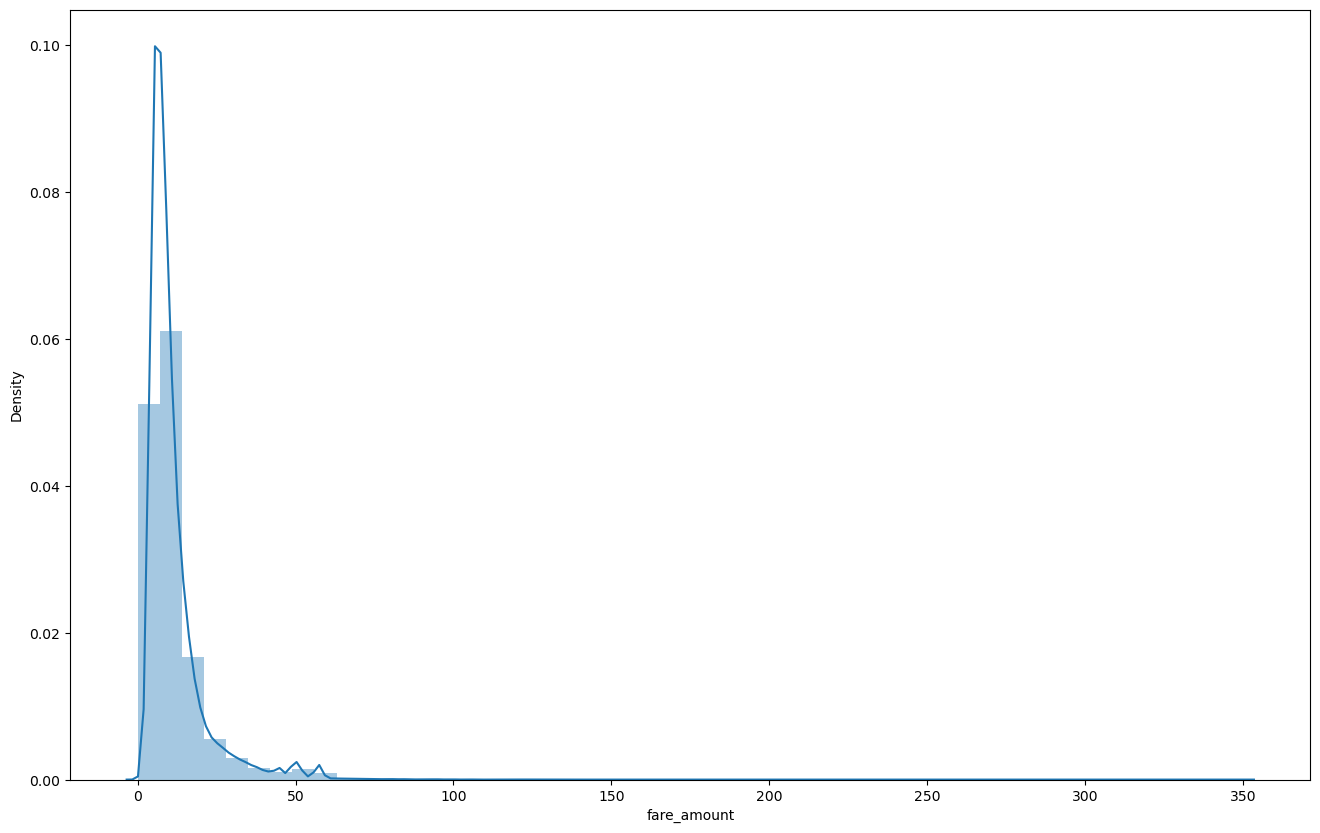

In [22]:
plt.figure(figsize=(16,10))
sns.distplot(df['fare_amount'])
plt.show()

# 3.Visualizing the Distribution of 'pickup_latitude'

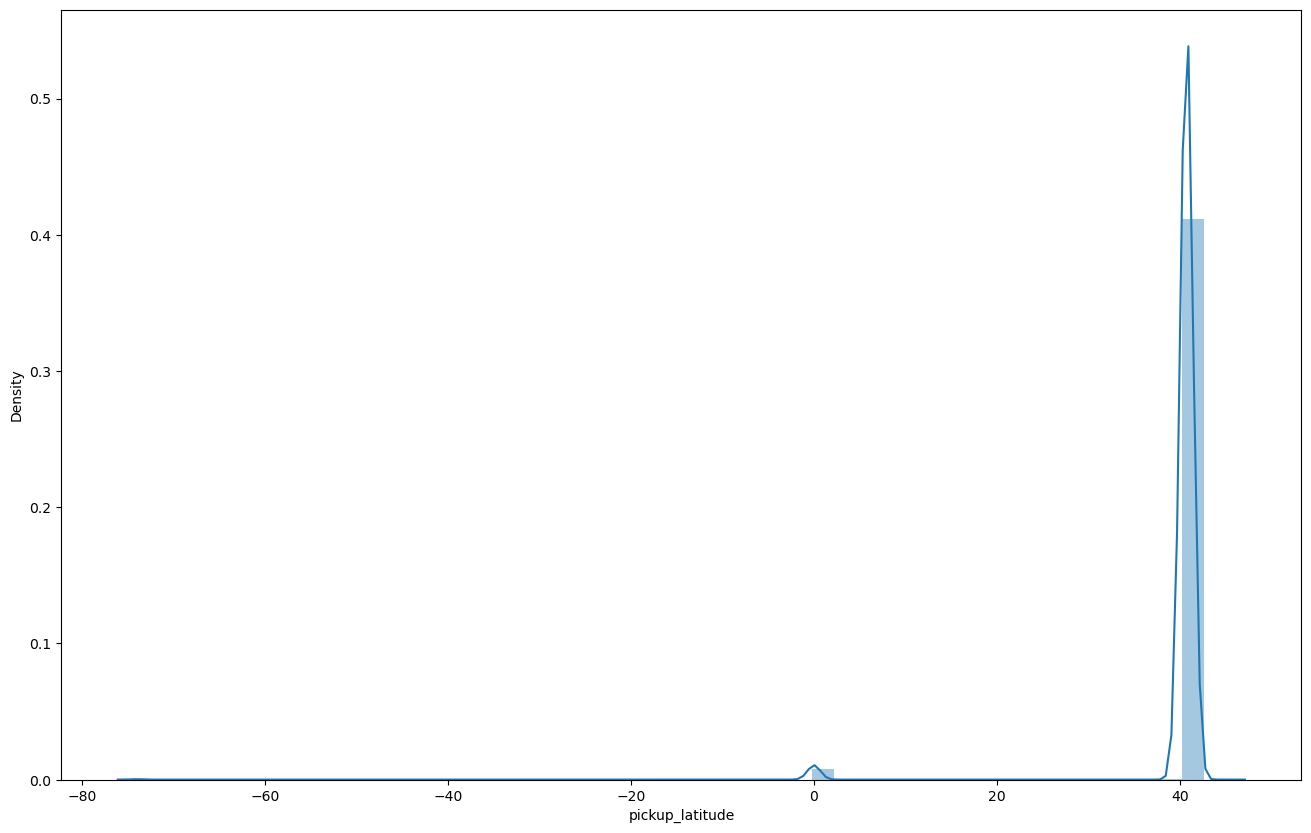

In [23]:
plt.figure(figsize=(16,10))
sns.distplot(df['pickup_latitude'])
plt.show()

# 4.Visualizing the Distribution of 'pickup_longitude'

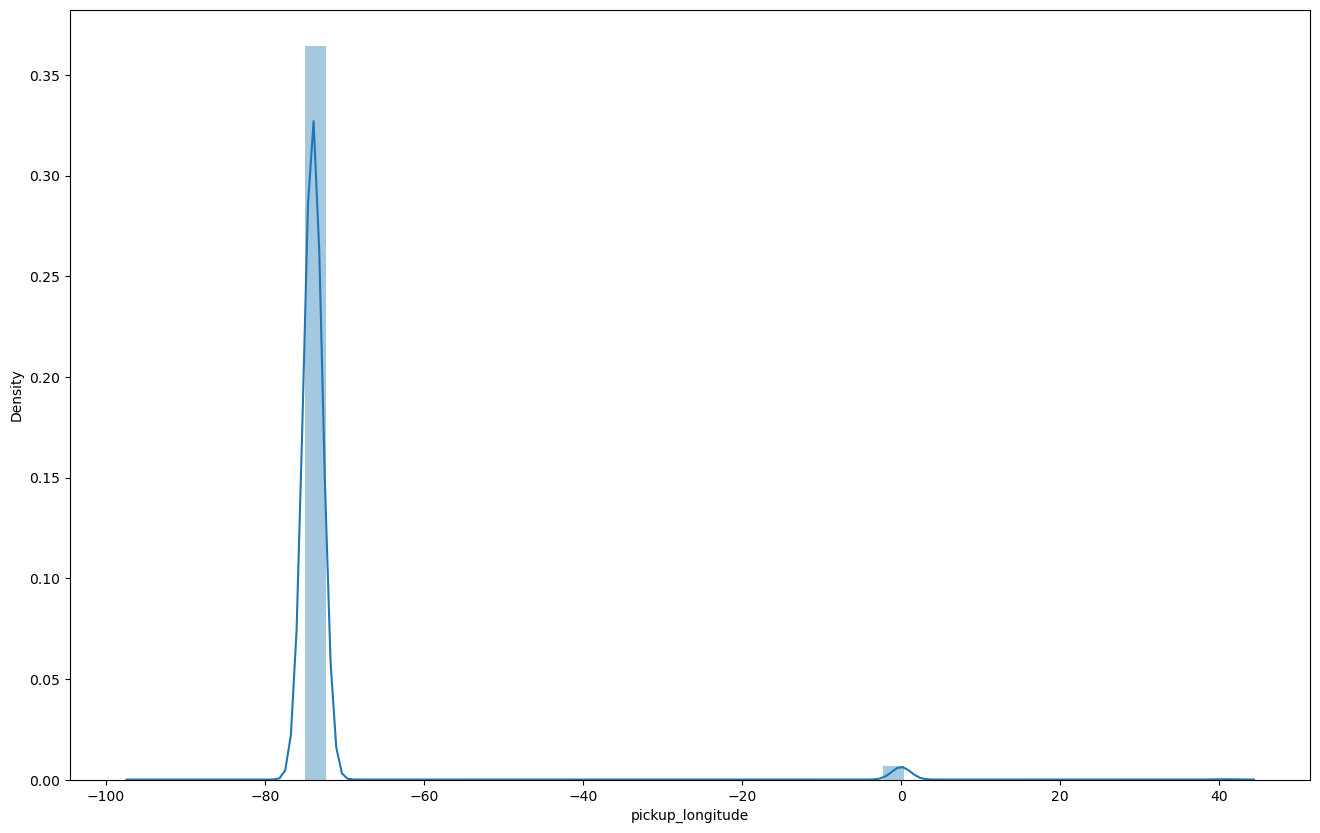

In [24]:
plt.figure(figsize=(16,10))
sns.distplot(df['pickup_longitude'])
plt.show()

# 5.Visualizing the Distribution of 'dropoff_latitude'

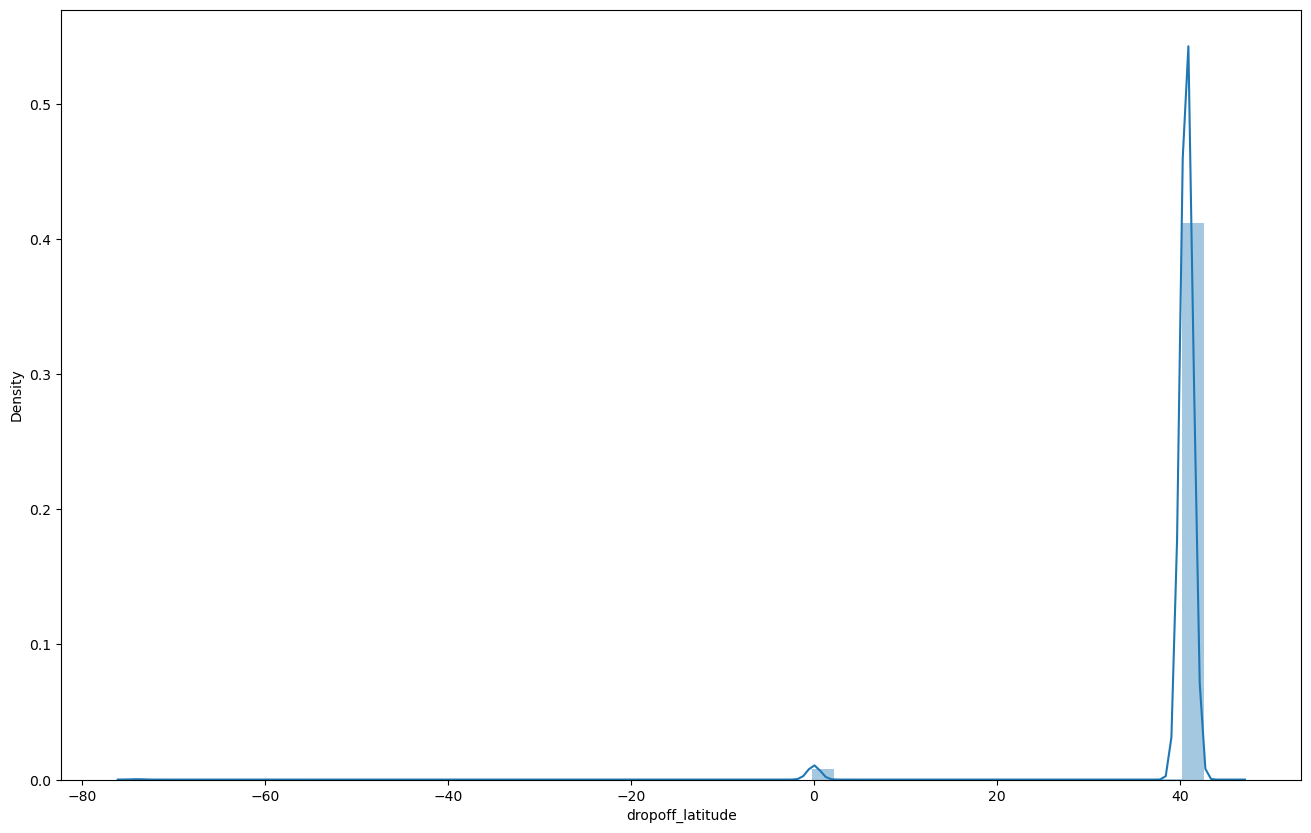

In [25]:
plt.figure(figsize=(16,10))
sns.distplot(df['dropoff_latitude'])
plt.show()

# 6.Visualizing the Distribution of 'dropoff_longitude'

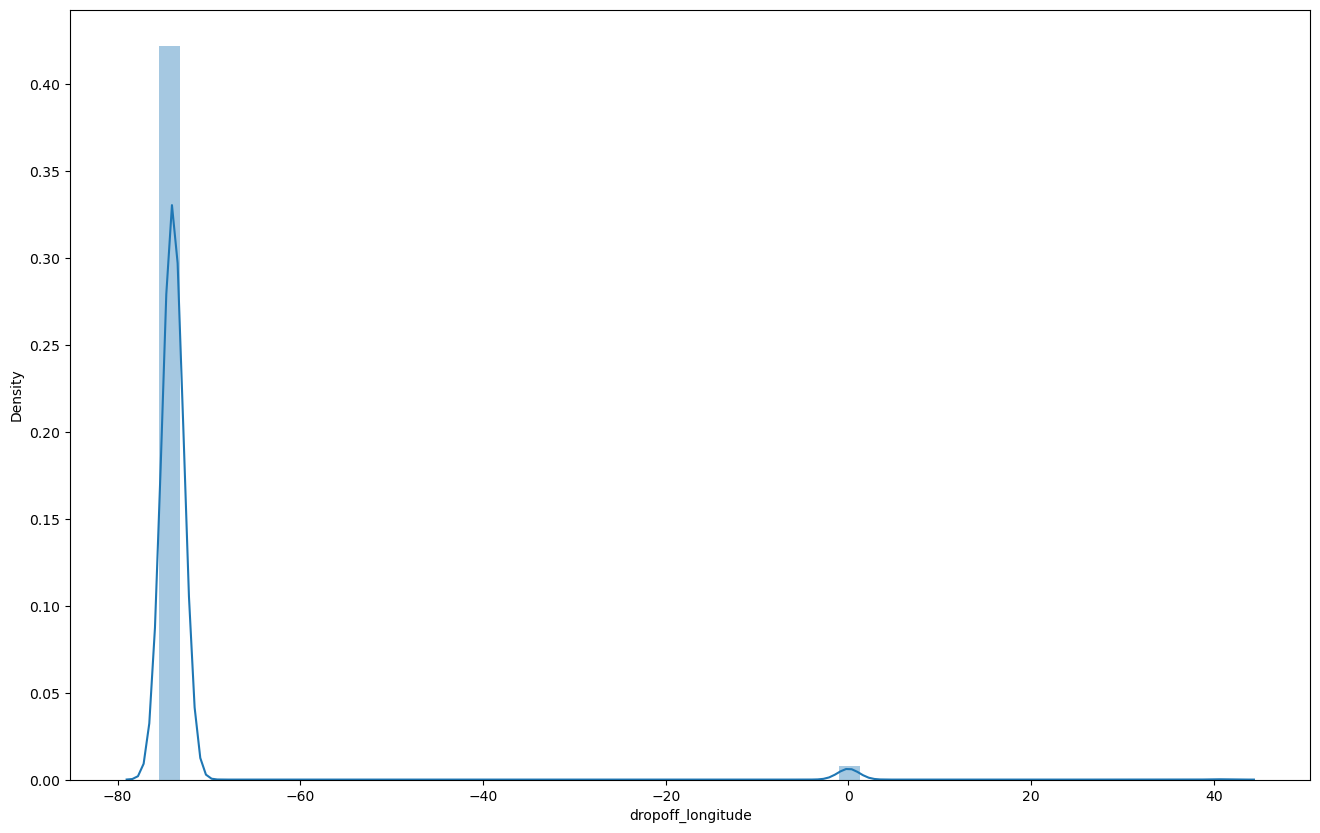

In [26]:
plt.figure(figsize=(16,10))
sns.distplot(df['dropoff_longitude'])
plt.show()

# Splitting the DataFrame into Training and Testing models

In [27]:
x=df.drop("fare_amount", axis=1)
y=df["fare_amount"]

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39996, 10)
(10000, 10)
(39996,)
(10000,)


# Predictive Analysis

# 1.Linear Regression

In [30]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
pred1 = lr.predict(x_test)

In [32]:
mean_squared_error(pred1,y_test)

95.8801426670573

In [33]:
r2_score(pred1,y_test)*100

-5261.542975199958

# 2.Random Forest Algorithm

In [34]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
pred2= rf.predict(x_test)

In [36]:
r2_score(pred2,y_test)*100

69.24285637776633

# 3.Decision Tree Algorithm

In [37]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [38]:
pred3=dt.predict(x_test)

In [39]:
r2_score(pred3,y_test)*100

56.955988040103

# 4.XGBoost Algorithm

In [40]:
xgbr = xgb.XGBRegressor()
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
pred4=xgbr.predict(x_test)

In [42]:
r2_score(pred4,y_test)*100

72.21671344367293

In [43]:
parameters = {'max_depth': [2,4,6],'n_estimators': [50,100,200]}

model= GridSearchCV(xgbr,parameters,scoring='accuracy', verbose=1)

model.fit(x_train,y_train)
#
print(model.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
nan
{'max_depth': 2, 'n_estimators': 50}


In [44]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',n_estimators =100, max_depth=6, random_state=101)
xgb_r.fit(x_train,y_train)

[19:17:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [45]:
pred5=xgb_r.predict(x_test)

In [46]:
r2_score(pred5,y_test)*100

72.21671344367293

# Visualizing the Regression plot 

<AxesSubplot:ylabel='fare_amount'>

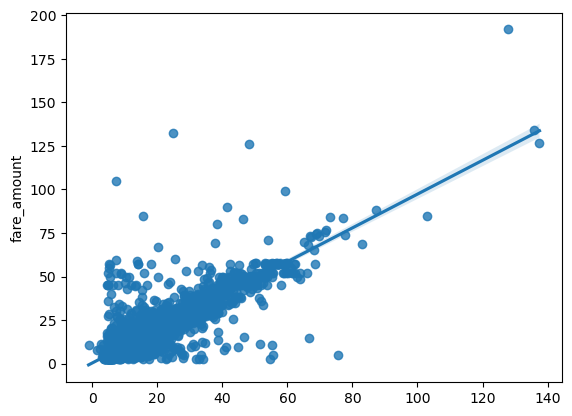

In [51]:
sns.regplot(pred4,y_test)